<a href="https://colab.research.google.com/github/mvalenciaar/-evaluacion-final-mvalenciaar2/blob/master/001_Extraccion_caracteristicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Extracción de características: TF-IDF - CountVectorizer()

Se utiliza para calificar la importancia de una palabra en un documento en función de la frecuencia con la que apareció en ese documento y en una colección determinada de documentos.

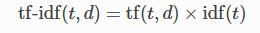

t representa el término

d representa el documento

**TF-IDF** es una de las mejores métricas para determinar qué tan significativo es un término para un texto en una serie o corpus. 
**TF-IDF** es un sistema de ponderación que asigna una ponderación a cada palabra en un documento en función de su frecuencia de término (TF) y la frecuencia de documento recíproca (TF)(IDF). Las palabras con puntuaciones más altas de peso se consideran más significativas.

En Python, los valores TF-IDF se pueden calcular utilizando el método *TfidfVectorizer()*

**Sintaxis:**

    sklearn.feature_extraction.text.TfidfVectorizer (entrada)

Convierta una colección de documentos sin procesar en una matriz de funciones TF-IDF, es equivalente a CountVectorizer.

**Parámetros**


*   **entrada:** puede ser nombre de archivo, archivo o contenido en sí.

**Atributos**


*   **Vocabulario:** Devuelve un diccionario de términos como claves y valores como índices de características.
*   **IDF:** Devuelve el vector de frecuencia de documento inverso.

**Devoluciones**


*   **fit_transform():**Devuelve una matriz de términos junto con los valores TF-IDF
*   **get_features_names():** Devuelve una lista de nombres de funciones.







# Librerías de trabajo

**Importar Librerías**


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

# Ejemplo con palabras claves de artículos de minería de texto

In [ ]:
corpus = [
'The artificial intelligence',
'data mining',
'Bibliometric analysis',
'artificial',
'text analysis',
'Bibliometric',
'The text mining',
'mining'
]
print(corpus)

['The artificial intelligence', 'data mining', 'Bibliometric analysis', 'artificial', 'text analysis', 'Bibliometric', 'The text mining', 'mining']


En la siguiente línea de código, se tiene almacenado en la variable corpus una cadena de caracteres y por medio de las funciones CountVectorizer() y fit_transform() se podrán separar cada una de las palabras que lo componen, y esto se conoce como token.

In [ ]:
cv = CountVectorizer(stop_words='english')
print(cv)
data = cv.fit_transform(corpus)
print(data)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
  (0, 1)	1
  (0, 4)	1
  (1, 3)	1
  (1, 5)	1
  (2, 2)	1
  (2, 0)	1
  (3, 1)	1
  (4, 0)	1
  (4, 6)	1
  (5, 2)	1
  (6, 5)	1
  (6, 6)	1
  (7, 5)	1


In [ ]:
print(cv.vocabulary_)

{'artificial': 1, 'intelligence': 4, 'data': 3, 'mining': 5, 'bibliometric': 2, 'analysis': 0, 'text': 6}


Las palabras que fueron contadas son las que se visualizan, sin embargo, excluye las palabras The, ya que pueden ser stop_words.

Los valores que acompañan a cada una de las palabras son las posiciones que tienen y se verán en la matriz de resultados.

In [ ]:
print('Frecuencias:')
print(data)

Frecuencias:
  (0, 1)	1
  (0, 4)	1
  (1, 3)	1
  (1, 5)	1
  (2, 2)	1
  (2, 0)	1
  (3, 1)	1
  (4, 0)	1
  (4, 6)	1
  (5, 2)	1
  (6, 5)	1
  (6, 6)	1
  (7, 5)	1


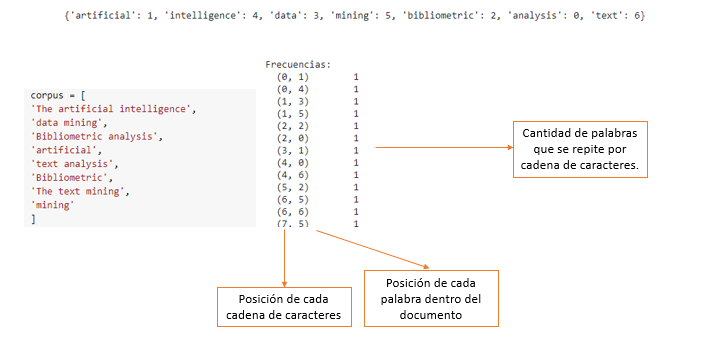

In [ ]:
#Por medio de data.toarray() se cambia la matriz para mayor legibilidad
print('Matriz:')
print(data.toarray())

Matriz:
[[0 1 0 0 1 0 0]
 [0 0 0 1 0 1 0]
 [1 0 1 0 0 0 0]
 [0 1 0 0 0 0 0]
 [1 0 0 0 0 0 1]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 1 1]
 [0 0 0 0 0 1 0]]


La primera línea de la matriz se refiere a la primera cadena, 1 cuando si aparece, 0 cuando no, si aparecen 2 veces entonces en vez de 1, sería el número 2, y así con cada línea de la matriz.

In [ ]:
# Se convierten los datos en una matriz de frecuencia
tfidf_trans = TfidfTransformer()
tfidf_matrix = tfidf_trans.fit_transform(data)
print(tfidf_matrix)
print(tfidf_trans)

  (0, 4)	0.7664298449085388
  (0, 1)	0.6423280258820045
  (1, 5)	0.5860071879963084
  (1, 3)	0.810305853129952
  (2, 2)	0.7071067811865475
  (2, 0)	0.7071067811865475
  (3, 1)	1.0
  (4, 6)	0.7071067811865475
  (4, 0)	0.7071067811865475
  (5, 2)	1.0
  (6, 6)	0.757091999321284
  (6, 5)	0.6533082768216707
  (7, 5)	1.0
TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)


In [ ]:
palabras = dict(zip(cv.get_feature_names(),tfidf_trans.idf_))
print(palabras)

{'analysis': 2.09861228866811, 'artificial': 2.09861228866811, 'bibliometric': 2.09861228866811, 'data': 2.504077396776274, 'intelligence': 2.504077396776274, 'mining': 1.8109302162163288, 'text': 2.09861228866811}


In [ ]:
for palabra, puntuacion in palabras.items():
    print(palabra, puntuacion)

analysis 2.09861228866811
artificial 2.09861228866811
bibliometric 2.09861228866811
data 2.504077396776274
intelligence 2.504077396776274
mining 1.8109302162163288
text 2.09861228866811


Los valores más altos son los que se repiten menos veces y los que son más bajos se repiten más veces.

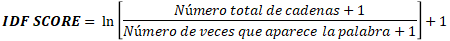

Para el caso de la palabra artificial, tenemos

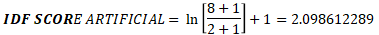

In [ ]:
# Para conocer la puntuación por palabra, sería:
print('Puntuación de artificial es: ', palabras['artificial'])

Puntuación de artificial es:  2.09861228866811


# Ejemplo con palabras claves de artículos de minería de texto - stop_words 

Si quisiera que no se contaran algunas palabras puntuales dentro de mi conjunto de palabras, utilizo un nuevo stop_words

In [ ]:
cv = CountVectorizer(stop_words= ['artificial'])
data = cv.fit_transform(corpus)
print(cv.vocabulary_)
print('Frecuencias:')
print(data)
print('Matriz:')
print(data.toarray())
tfidf_trans = TfidfTransformer()
tfidf_matrix = tfidf_trans.fit_transform(data)
palabras = dict(zip(cv.get_feature_names(),tfidf_trans.idf_))
for palabra, puntuacion in palabras.items():
    print(palabra, puntuacion)
print('Puntuación de mining es: ', palabras['mining'])

{'the': 6, 'intelligence': 3, 'data': 2, 'mining': 4, 'bibliometric': 1, 'analysis': 0, 'text': 5}
Frecuencias:
  (0, 6)	1
  (0, 3)	1
  (1, 2)	1
  (1, 4)	1
  (2, 1)	1
  (2, 0)	1
  (4, 0)	1
  (4, 5)	1
  (5, 1)	1
  (6, 6)	1
  (6, 4)	1
  (6, 5)	1
  (7, 4)	1
Matriz:
[[0 0 0 1 0 0 1]
 [0 0 1 0 1 0 0]
 [1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 1 1 1]
 [0 0 0 0 1 0 0]]
analysis 2.09861228866811
bibliometric 2.09861228866811
data 2.504077396776274
intelligence 2.504077396776274
mining 1.8109302162163288
text 2.09861228866811
the 2.09861228866811
Puntuación de mining es:  1.8109302162163288
